# CORRELATION AND REGRESSION

A textile company regularly spent money on five advertising companies for their 
ads.

1. First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.

2. Build a regression model to predict the profit from the given data and 
comment your findings on it.

3. Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement.

    Add1(in Thousands) 290

    Add2(in Thousands) 312

    Add3(in Thousands) 309
    
    Add4(in Thousands) 298

    Add5(in Thousands) 320

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to the python environment

In [2]:
data=pd.read_csv('Add_sales_data_2018.csv')

# Printing the dataset

In [3]:
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


<AxesSubplot:xlabel='Add5(in Thousands)', ylabel='Profit(in Thousands)'>

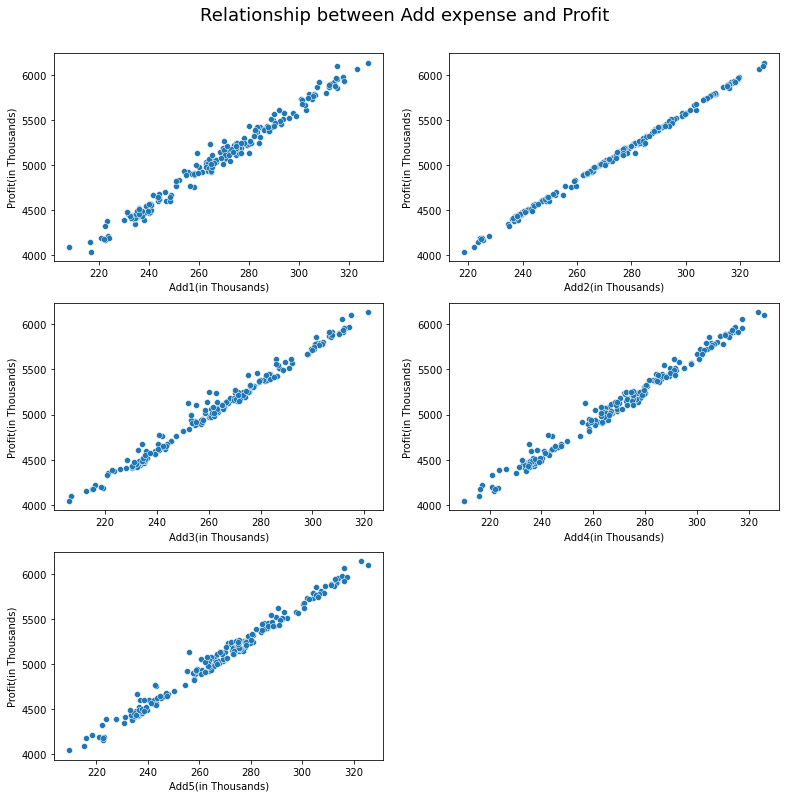

In [7]:
fig,ax= plt.subplots(figsize=(13,13))
fig.suptitle('Relationship between Add expense and Profit', fontsize=18, y=0.93)
ax1=plt.subplot(3,2,1)
sns.scatterplot(data=data, x="Add1(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,2)
sns.scatterplot(data=data, x="Add2(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,3)
sns.scatterplot(data=data, x="Add3(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,4)
sns.scatterplot(data=data, x="Add4(in Thousands)", y="Profit(in Thousands)",ax=ax1)
ax1=plt.subplot(3,2,5)
sns.scatterplot(data=data, x="Add5(in Thousands)", y="Profit(in Thousands)",ax=ax1)

Insights:
    
    * Add expenses of each companies are positively correlated to the profit generated.
    

In [14]:
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
add1=data['Add1(in Thousands)']
add2=data['Add2(in Thousands)']
add3=data['Add3(in Thousands)']
add4=data['Add4(in Thousands)']
add5=data['Add5(in Thousands)']
profit=data['Profit(in Thousands)']
pearsonr_coefficient,p_value=pearsonr(add1,profit)
print("Pearson Correlation Coefficient for add1: %0.3f"%(pearsonr_coefficient))
pearsonr_coefficient,p_value=pearsonr(add2,profit)
print("Pearson Correlation Coefficient for add2: %0.3f"%(pearsonr_coefficient))
pearsonr_coefficient,p_value=pearsonr(add3,profit)
print("Pearson Correlation Coefficient for add3: %0.3f"%(pearsonr_coefficient))
pearsonr_coefficient,p_value=pearsonr(add4,profit)
print("Pearson Correlation Coefficient for add4: %0.3f"%(pearsonr_coefficient))
pearsonr_coefficient,p_value=pearsonr(add5,profit)
print("Pearson Correlation Coefficient for add5: %0.3f"%(pearsonr_coefficient))

Pearson Correlation Coefficient for add1: 0.992
Pearson Correlation Coefficient for add2: 0.999
Pearson Correlation Coefficient for add3: 0.993
Pearson Correlation Coefficient for add4: 0.993
Pearson Correlation Coefficient for add5: 0.994


Insights:
    
    * Add2 has more stable relationship.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

Checking for null values

In [16]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

Insights: 
    
    * There are no null values.

Text(0.5, 1.0, 'Relationship between Add expenses and Profit')

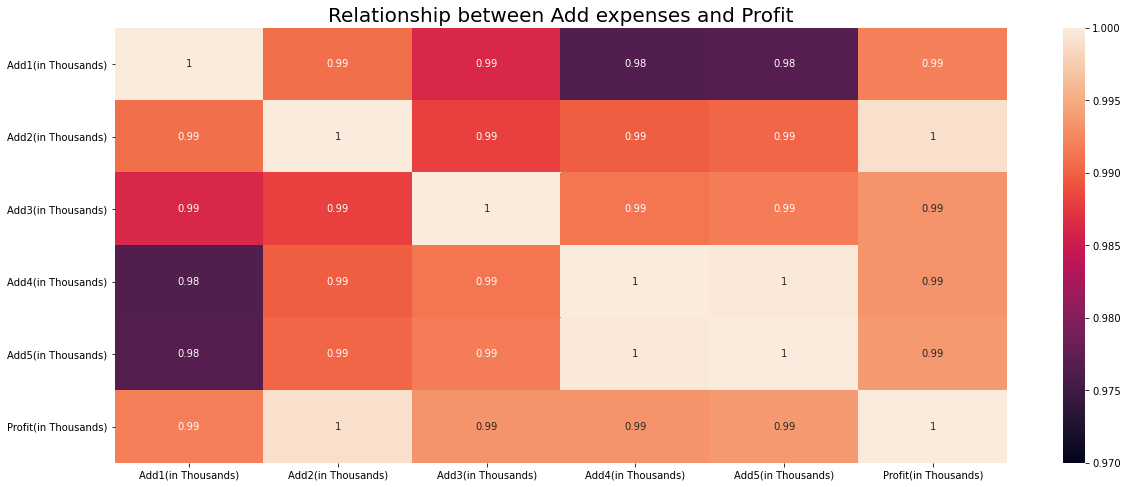

In [18]:
correlationmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(correlationmatrix,vmin=.97,vmax=1,annot=True)
plt.title('Relationship between Add expenses and Profit',fontsize=20)

Insights: 
    
    * All are highly correlated to each other.

Feature Reduction

In [19]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

For making a good prediction model, we should select significant features and remove others depending on correlation.

We can remove 'Date' feature from the data, as it does not contribute to prediction.

In [20]:
data1=data.drop(['Date'],axis=1)
data1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

Insights: 
    
    * All 5 Adds are highly correlated

    * Gives minimum Mean Square Error

In [21]:
#Assigning dependent value to "y"

y=data1['Profit(in Thousands)']

In [22]:
#Assigning independent values to "x"

x=data1.drop(['Profit(in Thousands)'],axis=1)

In [23]:
#Splitting data to train and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [24]:
#Making linear regression model

from sklearn import linear_model
lr=linear_model.LinearRegression()
model= lr.fit(x_train,y_train)

In [25]:
#Predicting test values

predictions=model.predict(x_test)

In [26]:
#Checking for accuracy for model using predictions and test values

1) Mean Square Error

In [27]:
from sklearn.metrics import mean_squared_error
print("MSE is=",mean_squared_error(y_test,predictions))

MSE is= 8.11273293080854e-25


2) Coefficient of determination

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("Coefficient of determination is",r2)

Coefficient of determination is 1.0


Insights:
    
    * MSE is very low and Coefficient of determination is 1, so we can say that the model is Perfect.

# 3) Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

Add1(in Thousands) 290

Add2(in Thousands) 312

Add3(in Thousands) 309

Add4(in Thousands) 298

Add5(in Thousands) 320

In [29]:
dict = {'Add1(in Thousands)':[290],
        'Add2(in Thousands)':[312],
        'Add3(in Thousands)':[309],
        'Add4(in Thousands)':[298],
        'Add5(in Thousands)':[320]}
  
data2 = pd.DataFrame(dict)
display(data2)

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [45]:
#Prediction

predictions=model.predict(data2)
predictionValue=round(predictions[0],2)
print("According to model, the Profit(in thousands) for above add budget =",predictionValue)

According to model, the Profit(in thousands) for above add budget = 5820.06


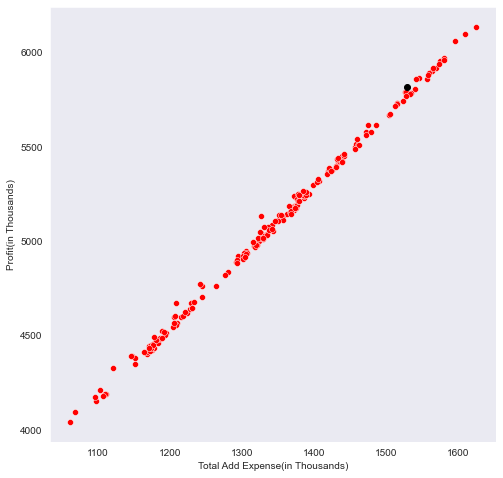

In [64]:
#Checking: If prediction result is similar to other values - Using Scatter Plot

Total_expense_of_pdctn=data2.sum(axis=1)
fig,ax= plt.subplots(figsize=(8,8))
ax.set(xlabel='Total Add Expense(in Thousands)')
sns.scatterplot(data=data, x=data1, y="Profit(in Thousands)",color="red")
plt.scatter(x=Total_expense_of_pdctn, y=predictionValue, color='black')

Insights:
    
    * The predicted Profit (in Thousands) is 5820.06